# 2D Convolution

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal

In this notebook, we will explore diferents options for a 2D convolution.

## Implementing the mathematic formula

In [2]:
# Import image (x(t))
x = mpimg.imread('images/sciences50.jpg')
x = x[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.

print(x)

[[ 55  56  56 ...  64  65  65]
 [ 56  56  56 ...  64  65  65]
 [ 56  56  56 ...  65  65  65]
 ...
 [134 126 117 ... 113 105  98]
 [118 130 142 ... 111 112 114]
 [137 141 138 ... 112 111 118]]


In [3]:
# Create filter (h(t))
h = np.array([1,4,7,10,7,4,1])
h = h*h[:,None]
h = h/h.sum()

print (h)

[[0.00086505 0.00346021 0.00605536 0.00865052 0.00605536 0.00346021
  0.00086505]
 [0.00346021 0.01384083 0.02422145 0.03460208 0.02422145 0.01384083
  0.00346021]
 [0.00605536 0.02422145 0.04238754 0.06055363 0.04238754 0.02422145
  0.00605536]
 [0.00865052 0.03460208 0.06055363 0.08650519 0.06055363 0.03460208
  0.00865052]
 [0.00605536 0.02422145 0.04238754 0.06055363 0.04238754 0.02422145
  0.00605536]
 [0.00346021 0.01384083 0.02422145 0.03460208 0.02422145 0.01384083
  0.00346021]
 [0.00086505 0.00346021 0.00605536 0.00865052 0.00605536 0.00346021
  0.00086505]]


In [4]:
# Compute 2D convolution y(t)=x(t)*h(t)
y=np.zeros((len(x),len(x[0])), dtype=float)
for m in range(len(x)):
    for n in range(len(x[0])):
        for i in range(len(h)):
            for j in range(len(h)):
                y[m,n]=y[m,n]+h[i,j]*x[m-i,n-j]

In [5]:
# fig = plt.figure()

# ax = fig.add_subplot(1, 3, 1)
# plt.imshow(h, cmap='gray')
# plt.title('h(t)')

# ax = fig.add_subplot(1, 3, 2)
# plt.imshow(x, cmap='gray')
# plt.title('x(t)')

# ax = fig.add_subplot(1, 3, 3)
# plt.imshow(y, cmap='gray')
# plt.title('y(t)=x(t)*h(t)')

# plt.show()

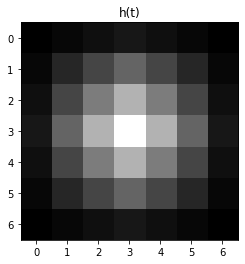

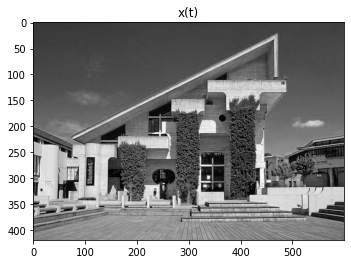

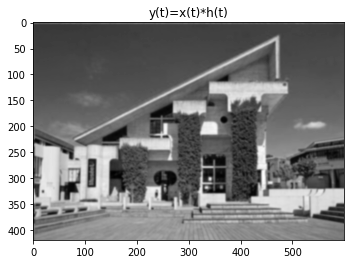

In [6]:
plt.imshow(h, cmap='gray')
plt.title('h(t)')
plt.show()

plt.imshow(x, cmap='gray')
plt.title('x(t)')
plt.show()

plt.imshow(y, cmap='gray')
plt.title('y(t)=x(t)*h(t)')
plt.show()

## Using convolve2D()

This function convolves two 2D arrays. The convolution is determined directly from sums, the definition of convolution.

In [7]:
# Compute 2D convolution y(t)=x(t)*h(t)
y = np.zeros((len(x),len(x[0])), dtype=float)
y = signal.convolve2d(x, h, boundary='symm', mode='full')

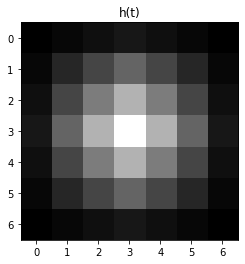

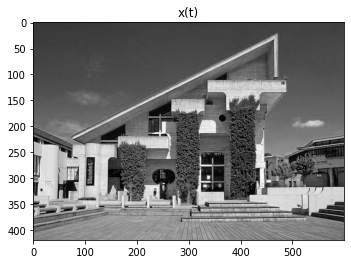

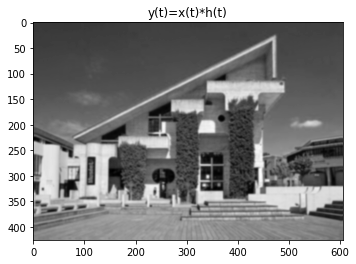

In [9]:
plt.imshow(h, cmap='gray')
plt.title('h(t)')
plt.show()

plt.imshow(x, cmap='gray')
plt.title('x(t)')
plt.show()

plt.imshow(y, cmap='gray')
plt.title('y(t)=x(t)*h(t)')
plt.show()

## Using fftconvolve()

Convolve two N-dimensional arrays using FFT, with the output size determined by the mode argument.

In [10]:
# # Compute 2D convolution y(t)=x(t)*h(t)
y = np.zeros((len(x),len(x[0])), dtype=float)
y = signal.fftconvolve(x, h, mode='full')

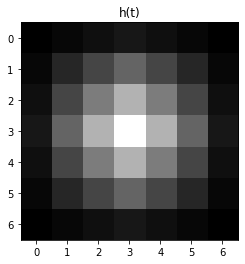

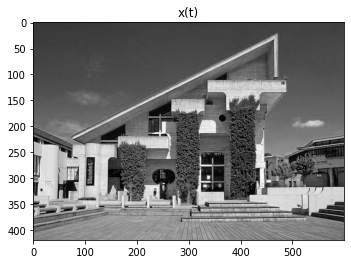

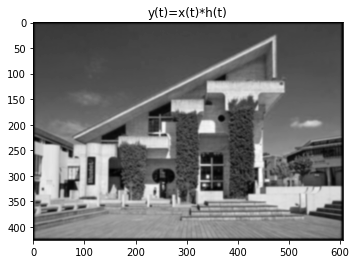

In [11]:
plt.imshow(h, cmap='gray')
plt.title('h(t)')
plt.show()

plt.imshow(x, cmap='gray')
plt.title('x(t)')
plt.show()

plt.imshow(y, cmap='gray')
plt.title('y(t)=x(t)*h(t)')
plt.show()